# DATA203 / Fall 2025 / HW4: [SUBODH RAJ PANDEY]

## (35%) Continue the African-American poetry digital humanities exploration in Python and Pandas. 

### **&#167; Task:**  **1.1 Explore poem length changes over time.**

**NOTE:** To get 
an accurate word count, you will need to 
remove punctuation.  **Use the code you wrote in HW2** 
to properly remoce punctionation, otherwise you will lose some points
for the wrong answer.

Here is the detailed function requirement specification:

_function_ **NAME**: `mean_word_count`


_function_ **INPUT**

  - a Pandas DataFrame (the Poetry dataset from HW3)

_function_ **OUTPUT**

  - `None` if the mean cannot be computed,
  - otherwise, the mean word count of the `text` column of the dataset

_Code Example_:
```python
  df = pd.read_csv( [the HW3 poetry dataset] )
  mean_word_count(df)
```

_Output_:
```python
  122.3
```

In [1]:
## PYTHON ANSWER HERE
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/melaniewalsh/responsible-datasets-in-context/main/datasets/aa-periodical-poetry/African-American-Periodical-Poetry_1900-1928-Created-by-Amardeep-Singh-and-Kate-Hennessey,-Lehigh-University.csv")
df

,title,author (first last),author (last name),text,month,year,venue,edited by,form (if known),gender (if known),themes,second venue,published in (city),Magazine Type,Author Bio.
0,New Wars,Benjamin Griffith Brawley,Brawley,HURL on the lance! Break up the ancient peace!...,November,1900,Colored American,Walter W. Wallace,Common Measure,male,"Spanish-American War, Empire",NaN,Boston,Predom. Black,https://en.wikipedia.org/wiki/Benjamin_Griffit...
1,A Picture,Olivia Ward Bush-Banks,Bush-Banks,I drew a picture long ago —\nA picture of a su...,June,1900,Colored American,Walter W. Wallace,Common Measure,female,NaN,NaN,Boston,Predom. Black,https://en.wikipedia.org/wiki/Olivia_Ward_Bush...
2,The Christmas Reunion,Augustus M. Hodges,Hodges,"Twas a bright Christmas morning in ""Ole Kentuc...",December,1900,Colored American,Walter W. Wallace,NaN,male,Slavery,NaN,Boston,Predom. Black,https://en.wikipedia.org/wiki/Augustus_M._Hodges
3,A Memorial of Frederick Douglass,C. Henry Holmes,Holmes,"He was a noble hero, born in an humble state,\...",September,1900,Colored American,Walter W. Wallace,Elegy,male,Frederick Douglass,NaN,Boston,Predom. Black,NaN
4,The Negro's Worth,Alonzo Milton Skrine,Skrine,"Who casts a slur on Negro worth, a stain on Ne...",December,1900,Colored American,Walter W. Wallace,NaN,male,"Civil War, Spanish-American War, Labor, Slaver...",NaN,Boston,Predom. Black,https://scalar.lehigh.edu/african-american-poe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,Murderer,Walter Waring,Waring,"What did they mean,\nTen years ago,\nWhen they...",September,1928,The Crisis,W.E.B. Du Bois,Free Verse,male,NaN,NaN,New York,Predom. Black,https://philly.newspapers.com/article/the-phil...
979,Retort,Walter Waring,Waring,Though you point out our lowly birth\nAnd boas...,June,1928,Black Opals,"Nellie R. Bright, Arthur Huff Fauset, Allan Ra...",NaN,male,NaN,NaN,Philadelphia,Predom. Black,https://philly.newspapers.com/article/the-phil...
980,Jubilee Singers,Mary J. Washington,Washington,"Mellow notes,\nFluted \nVibrant with the echoe...",February,1928,The Crisis,W.E.B. Du Bois,NaN,female,"Music, HBCU",NaN,New York,Predom. Black,NaN
981,When a Jazz Band Plays,Roscoe Wright,Wright,I see shining black hair smoothed back\non rou...,June,1928,Saturday Evening Quill,Eugene Gordon,NaN,male,"Music, Jazz",NaN,NaN,Predom. Black,NaN


In [2]:
import string

def mean_word_count(df):

    if "text" not in df.columns:
        return None

    texts = df["text"].dropna()
    if texts.empty:
        return None
    
    remove_punct = str.maketrans("", "", string.punctuation)
    
    def count_words(poem):
        cleaned = poem.translate(remove_punct)
        tokens = cleaned.split()              
        return len(tokens)
    
    word_counts = texts.apply(count_words)

    if word_counts.empty:
        return None
    
    return word_counts.mean()


In [3]:
mean_word = mean_word_count(df)
print(mean_word)

138.1739572736521


### **&#167; Task:**  **1.2 Write a second function `median_word_count()` which computes the median word count.**

This will be a very simple change to your `mean_word_count()` code.

In [4]:
## PYTHON ANSWER HERE

def median_word_count(df):
   
    if "text" not in df.columns:
        return None

    texts = df["text"].dropna()
    if texts.empty:
        return None
    
    remove_punct = str.maketrans("", "", string.punctuation)
    
    def count_words(poem):
        cleaned = poem.translate(remove_punct)
        tokens = cleaned.split()
        return len(tokens)
    
    word_counts = texts.apply(count_words)

    if word_counts.empty:
        return None

    return word_counts.median()

In [5]:
median_word = median_word_count(df)
print(median_word)

104.0


### **&#167; Task:**  **1.3 Write a third function called `word_count()` which takes and additional parameter, `method`, which can take one of two string values `"mean"` or `"median"`.**

There are a lot of ways to do this, but one way is to just
embed and call the functions you've already written based on the value of `method` (using
`if..else`).

Here is the function requirement specification:

_function_ **NAME**: `word_count`


_function_ **INPUT**

  - `df`: a Pandas DataFrame (the Poetry dataset from HW3)
  - `method`: a string that takes one of two values (`"median"` or `"mean"`)

_function_ **OUTPUT**

  - `None` if the method cannot be computed,
  - otherwise, the mean or median word count of the `text` column of the dataset based on the
    given `method`.

_Code Example_:
```python
  df = pd.read_csv( [the HW3 poetry dataset] )
  word_count(df, method="median")
```

_Output_:
```python
  120.7
```


In [6]:
## PYTHON ANSWER HERE
def word_count(df, method="mean"):
 
    method = method.lower()
    if method == "mean":
        return mean_word_count(df)
    elif method == "median":
        return median_word_count(df)
    else:
        return None


In [7]:
word_count(df, method="mean")

np.float64(138.1739572736521)

In [8]:
word_count(df, method="median")

np.float64(104.0)

### **&#167; Task:**  **1.4 Use  `word_count()` to determine the word counts specified below:**

To complete the next part, please review the [`DataFrame.query()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) method.  You will need it!

**Show the code:**

1. to compute the word count for poems before 1910 (`year` is less than 1910),
2. to compute the word count for poems between 1910 and 1919,
3. to compute the word count for poems after 1919 (`year` greater than 1919).

**Answer:**

1. What general trend did you observe in word count?

In [9]:
## PYTHON ANSWER HERE
before_1910 = df.query("year < 1910")
word_count(before_1910, method="mean")

np.float64(183.24333333333334)

In [10]:
from_1910_1919 = df.query("1910 <= year <= 1919")
word_count(from_1910_1919, method="mean")

np.float64(174.3217391304348)

In [11]:
after_1919 = df.query("year > 1919")
word_count(after_1919, method="mean")

np.float64(107.05105633802818)

In [12]:
# I can see the decreasing trend of the word count from year 1910  to 1919 and then even decreased after 1919.
# The poems are being shorter over time.

### **&#167; Task:**  **1.5 Plot the mean word counts for all years (1900-1928) using a bar plot.**

The $x$-axis is the year and $y$-axis the word count.

**Answer:**

1. Did you learn anything new by plotting all years?

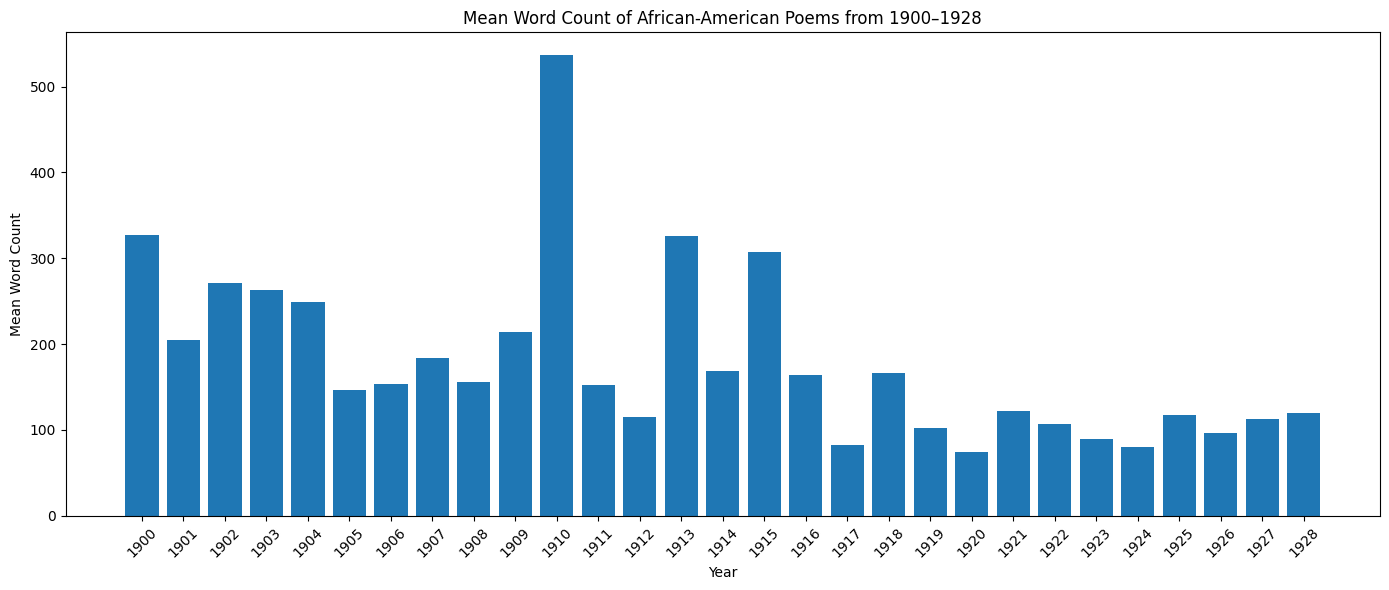

In [13]:
## PYTHON ANSWER HERE
import matplotlib.pyplot as plt

years = range(1900, 1929)
mean_counts = []

for y in years:
    subset = df.query("year == @y")
    mean_wc = word_count(subset, method="mean")
    mean_counts.append(mean_wc)

plt.figure(figsize=(14, 6))
plt.bar(years, mean_counts)
plt.xlabel("Year")
plt.ylabel("Mean Word Count")
plt.title("Mean Word Count of African-American Poems from 1900–1928")
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# I saw some outlier in years 1910, 1913 and 1915. Apart from that; in general the word count seems decreasing in general.

### **&#167; Task:**  **BONUS:** Plot both mean and median word counts on the same bar plot.

This will be worth an extra 2 points bonus.

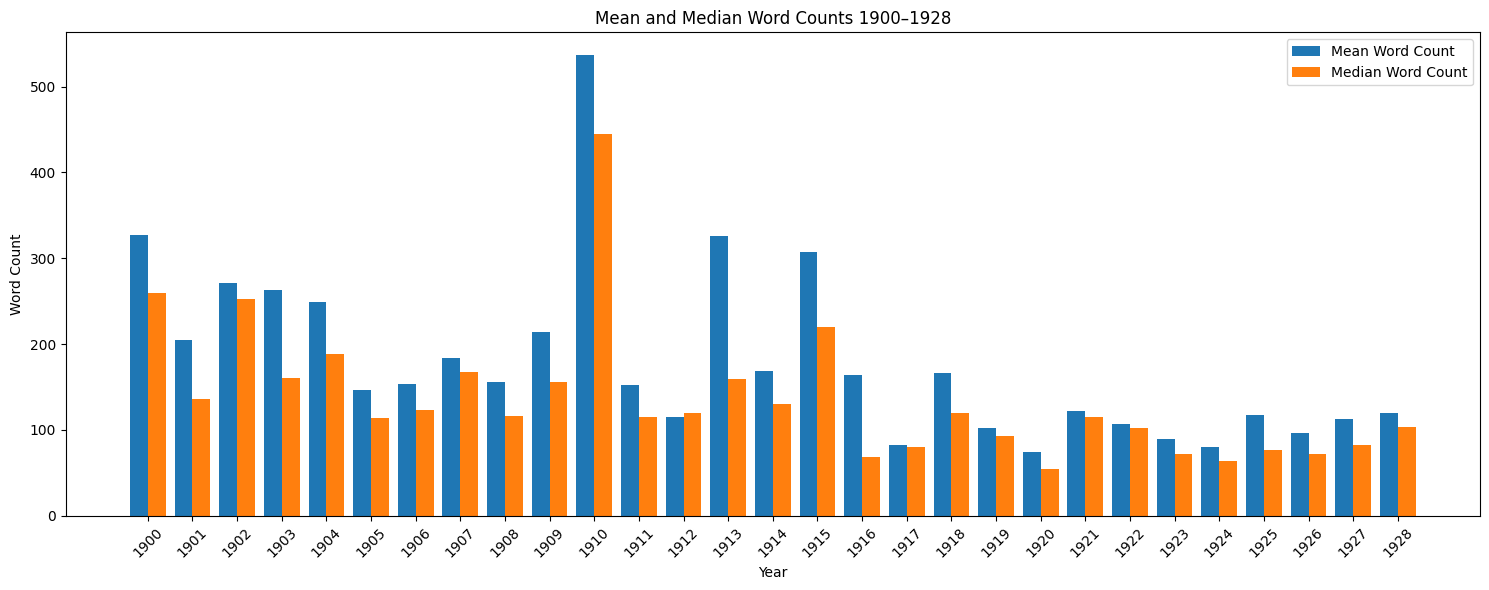

In [15]:
## PYTHON ANSWER HERE
import matplotlib.pyplot as plt
import numpy as np

years = list(range(1900, 1929))

mean_counts = []
median_counts = []

for y in years:
    subset = df.query("year == @y")
    mean_counts.append(word_count(subset, method="mean"))
    median_counts.append(word_count(subset, method="median"))

x = np.arange(len(years))
width = 0.4

plt.figure(figsize=(15, 6))

plt.bar(x - width/2, mean_counts, width=width, label="Mean Word Count")

plt.bar(x + width/2, median_counts, width=width, label="Median Word Count")

plt.xticks(x, years, rotation=45)
plt.xlabel("Year")
plt.ylabel("Word Count")
plt.title("Mean and Median Word Counts 1900–1928")
plt.legend()
plt.tight_layout()
plt.show()

## (35%) Explore thematic shifts over time. 

Here is the provided `get_theme_tuples()` function qhixh you will use in your code.

In [16]:
def get_theme_tuples(df):
    theme_list = []
    
    for y, t in df[['year', 'themes']].dropna().values:
        for v in [_t.strip().lower() for _t in  t.split(',')]:
            theme_list.append((y,v))
  
    return theme_list

### **&#167; Task:**  **2.1 Convert the output of `get_theme_tuples()` to a proper DataFrame.**

Your final DataFrame will look something like:

|    |   year | theme                            |
|:--:|-------:|:---------------------------------|
|  0 |   1900 | spanish-american war             |
|  1 |   1900 | empire                           |
|  2 |   1900 | slavery                          |
|  3 |   1900 | frederick douglass               |
|  4 |   1900 | civil war                        |
|  &#8230; |  &#8230; | &#8230;             |
  

In [17]:
## PYTHON ANSWER HERE

theme_tuples = get_theme_tuples(df)
theme_df = pd.DataFrame(theme_tuples, columns=["year", "theme"])
theme_df

,year,theme
0,1900,spanish-american war
1,1900,empire
2,1900,slavery
3,1900,frederick douglass
4,1900,civil war
...,...,...
818,1928,empire
819,1928,music
820,1928,hbcu
821,1928,music


### **&#167; Task:**  **2.2 Make a Seaborn violin plot for the theme `"religion"`.**

Study violin plots here:

* [Seaborn violin plots documentation](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

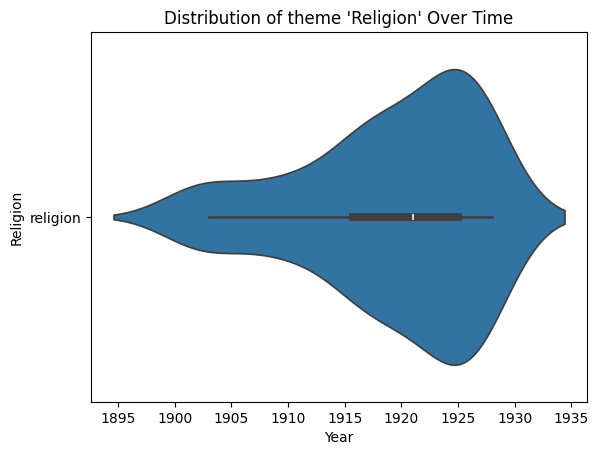

In [18]:
## PYTHON ANSWER HERE
import seaborn as sns

religion_df = theme_df.query("theme == 'religion'")

sns.violinplot(
    data=religion_df,
    x="year",
    y="theme",
)

plt.title("Distribution of theme 'Religion' Over Time")
plt.xlabel("Year")
plt.ylabel("Religion")
plt.show()

### **&#167; Task:**  **2.3 Write a function called `plot_themes` which takes the theme DataFrame and a `theme_list` list as input and returns the violin plot for all themes in `theme_list`.**

Do not overthink it.  The violin plot will do nearly
all the work for you.  You just need to make sure
that the DataFrame you send to it _only_ contains
the rows with the themes in `theme_list`.

Here is the function requirement specification:

_function_ **NAME**: `plot_themes`


_function_ **INPUT**

  - `df`: a Pandas DataFrame of themes with columns `year` and `theme`
  - `theme_list`: a list of themes (e.g. `["hbcu", "world war i", "civil war"]`)

_function_ **OUTPUT**

  - an empy plot if the themes cannot be found,
  - otherwise, the Seaborn violin plot of the themes

_Code Example_:
```python
  df_themes = pd.read_csv( [the HW3 poetry dataset] )
  plot_themes(df_themes, theme_list=["labor"])
```

_Output_:
```python
# the Seaborn violin plot

```

In [19]:
## PYTHON ANSWER HERE
def plot_themes(df, theme_list):
    
    subset = df[df["theme"].isin([t.lower() for t in theme_list])]
    
    if subset.empty:
        plt.figure()
        plt.title("No themes found")
        return
    
    plt.figure(figsize=(12, 6))
    
    sns.violinplot(
        data=subset,
        x="year",
        y="theme",
        inner="quartile"
    )
    
    plt.xlabel("Year")
    plt.ylabel("Theme")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

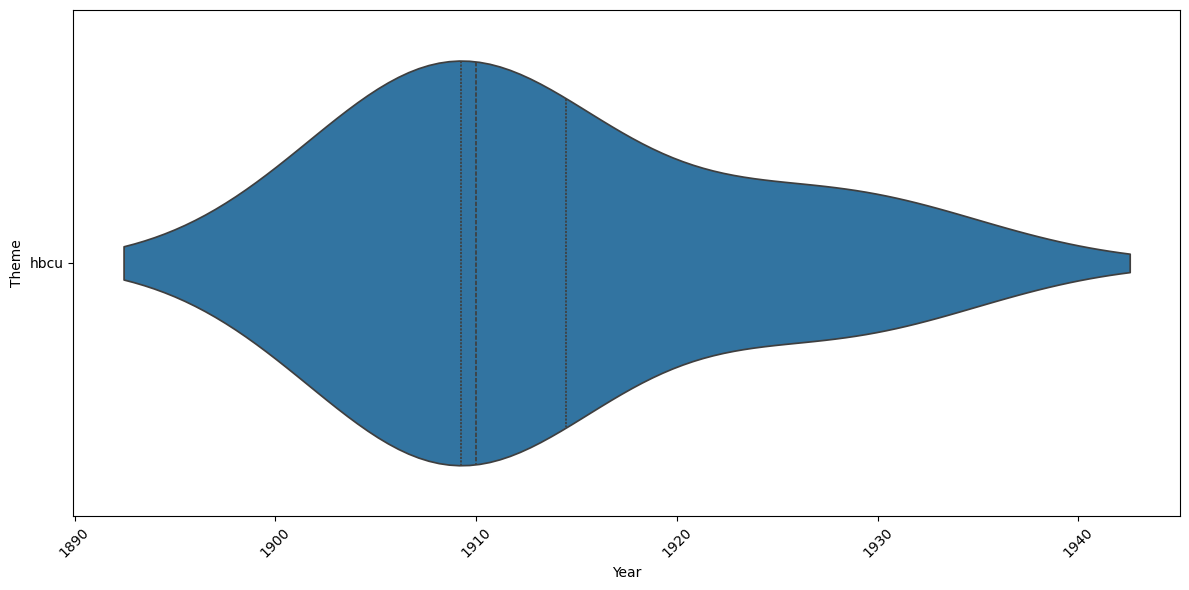

In [20]:
plot_themes(theme_df, theme_list=["hbcu"])

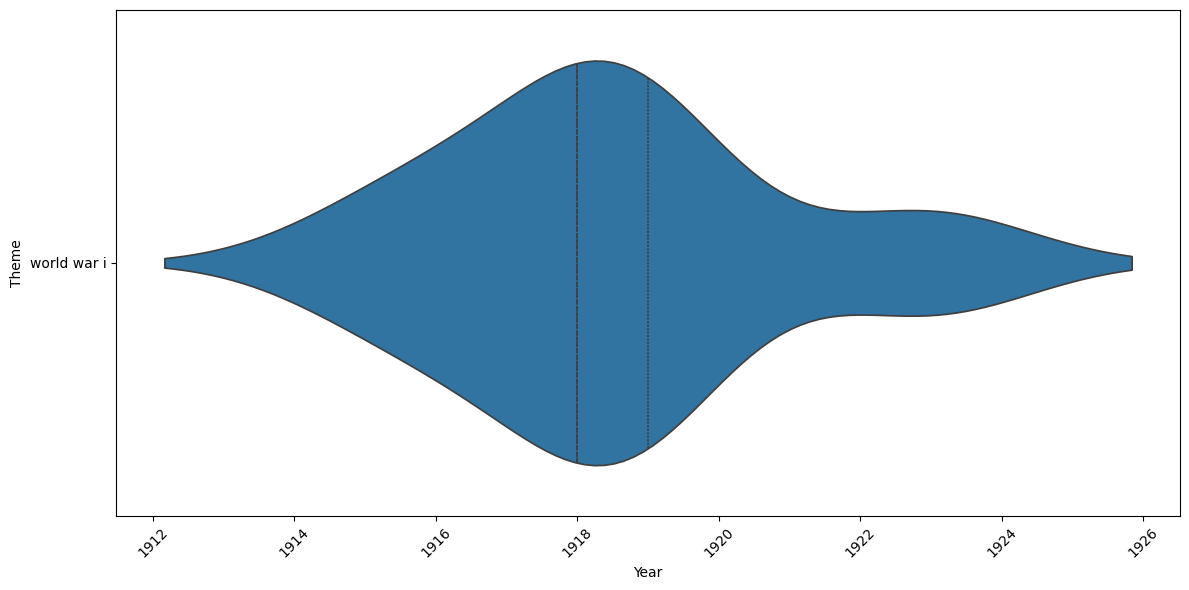

In [21]:
plot_themes(theme_df, theme_list=["world war i"])

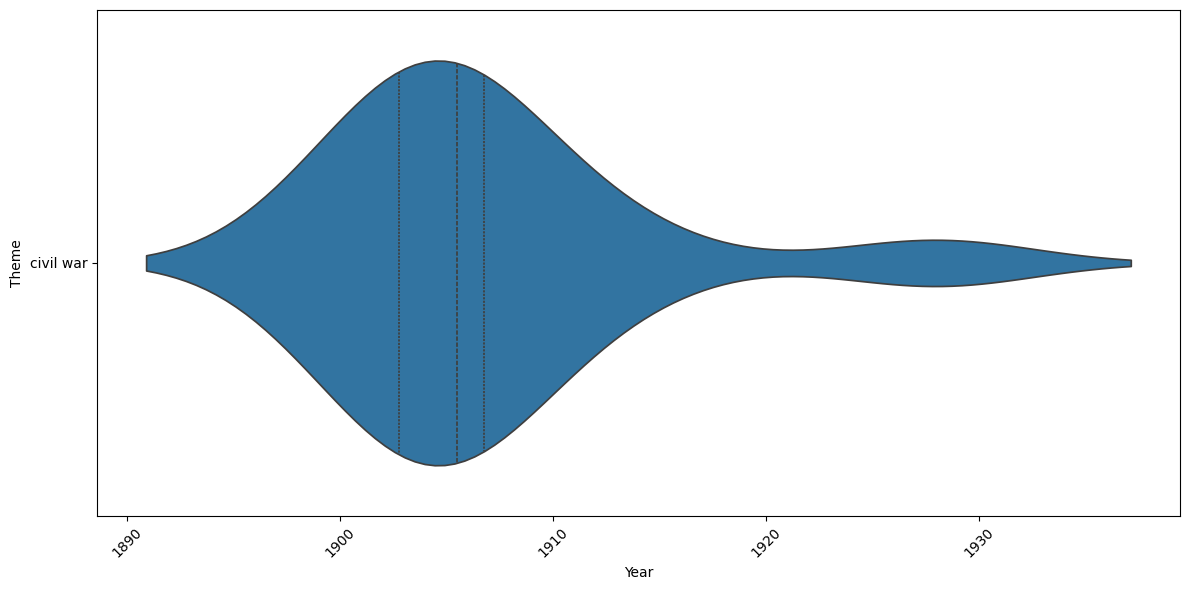

In [22]:
plot_themes(theme_df, theme_list=["civil war"])

### **&#167; Task:**  **2.4 Plot the violin plots using your `plot_themes()` function.**

Produce the violin plot for:

* `theme_list=['harlem', 'africa', 'music', 'religion', 'racism']`

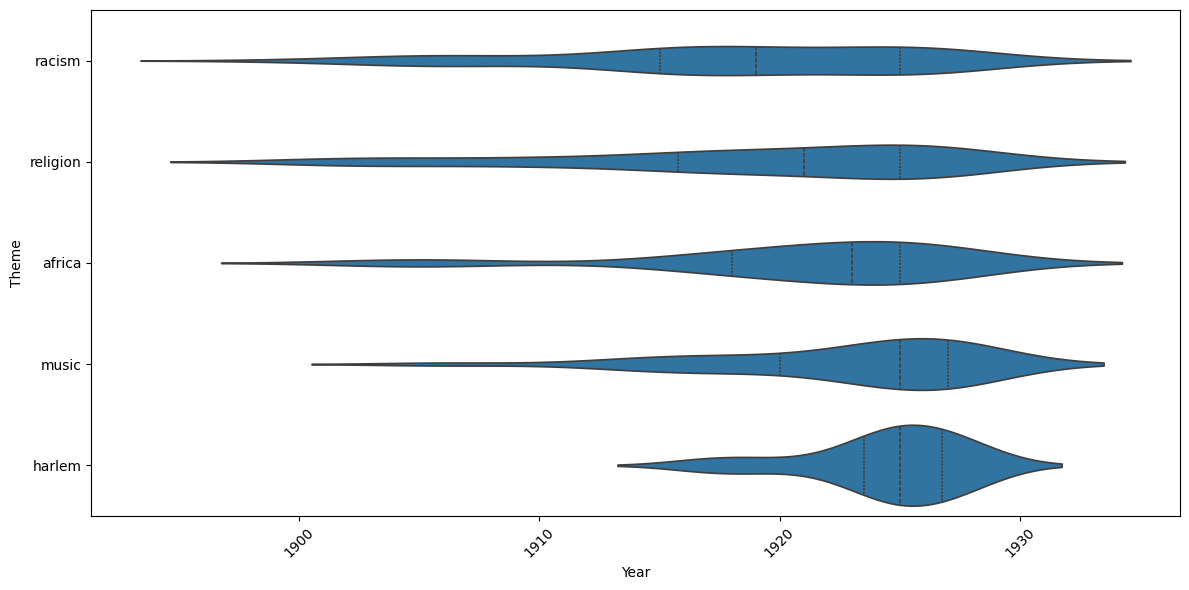

In [23]:
## PYTHON ANSWER HERE
plot_themes(
    theme_df,
    theme_list=['harlem', 'africa', 'music', 'religion', 'racism']
)


### **&#167; Task:**  **BONUS:** (_up to +2 points_) Explain why there may be some issues with the themes _as is_.  Provide concrete _examples and propose a solution on what to do about it.

In [24]:
## PYTHON ANSWER HERE

## Issues
# Inconsistent naming
# Double word naming
# Capital letter issues
# Use of synonyms
# Maybe some theme was popular in some period, and everyone was writing poems about a particular subject. 
# Maybe the theme grows weaker after certain years.

##Solution
# Making a vocabulary list for synonyms
# Identify the inconsistent naming and make it consistent
# Making our code case independent

### **&#167; Task:**  **BONUS:** (_up to +2 points_) Write the code which provides the top 15 most common themes over all years.

In [25]:
## PYTHON ANSWER HERE

theme_counts = theme_df["theme"].value_counts()
top_15_themes = theme_counts.head(15)

print(top_15_themes)

theme
religion                            88
racism                              55
race                                53
progress and racial uplift          50
slavery                             42
africa                              39
labor                               39
prize-winning                       32
music                               31
aave                                29
travel-migration-great migration    27
intertext                           26
lynching and racialized violence    23
interracial                         23
motherhood                          19
Name: count, dtype: int64


## (30%) Build a supervised learning poem classifier. 

In [26]:
## PYTHON ANSWER HERE

### **&#167; Task:**  **3.1 Review `fasttext` and install `fasttext-numpy2` for text classification.**
Familiarize yourself with its capabilities 
here: 

* [`fasttext`: Library for fast text representation and classification.](https://github.com/facebookresearch/fastText)


`fasttext-numpy2` documentation can be found here:

* [`fasttext-numpy2`](https://github.com/simon-ging/fasttext-numpy2)  fork of `fasttext` by Simon Ging (thank you!)

Install  `fasttext-numpy2` with:

```python
  !pip install fasttext-numpy2
```

In [27]:
## PYTHON ANSWER HERE
!pip install fasttext-numpy2

Defaulting to user installation because normal site-packages is not writeable


### **&#167; Task:**  **3.2 Prepare a training dataset for `fasttext-numpy2`.**

In order to run the classifier you need two files: (1) a training set 
which contains the data which are labeled _examples_ of the 
classes you're trying to learn, and (2) an unlabeled test set of data 
which have not been seen by the classifier.

The unlabeled data will be assigned labels once the
classifier has been trained.

Use the provided function `make_training_set()` to 
make a labeled dataset.  Make sure your 
file is named `train.txt` (which is the default
file name in the provided function).

Now you will have a training set file.

In [28]:
### PROVIDED FUNCTION FOR USE
def make_training_set(df, theme, label='notpolitical', outfile="train.txt", append_if_exists=True):
    pd.set_option('future.no_silent_downcasting', True)
    train_idx = []

    if append_if_exists:
        flag = "a"
    else:
        flag ="w"
        
    with open("train.txt", flag, encoding='utf8') as fo:
        c = df[df.themes.str.lower().str.contains(theme).fillna(False)].text.str.replace("\n", " ")
        
        for s in c.values:
            fo.write(f"__label__{label} {s}\n")
        
        train_idx.extend(c.index.values)

    with open("train_idx.txt", flag) as fo:
        for i in train_idx:
            fo.write(f"{i}\n")

In [29]:
## PYTHON ANSWER HERE
make_training_set(df, theme="racism|race|slavery|lynching|racial uplift|religion|progress and racial uplift|africa|labor|aave|travel-migration-great migration|interracial", label="political", append_if_exists=False)

In [30]:
make_training_set(df, theme="music|prize-winning|motherhood|intertext", label="notpolitical", append_if_exists=True)

In [31]:
import fasttext
model = fasttext.train_supervised("train.txt")

Read 0M words
Number of words:  16656
Number of labels: 2
Progress: 100.0% words/sec/thread:  267983 lr:  0.000000 avg.loss:  0.502277 ETA:   0h 0m 0s


### **&#167; Task:**  **3.3 Use the provided `test.txt` file and `run_classifier()` function to produce a new DataFrame.**
  
  The output will contain the labels and confidence from the classifier.

  You may want to run the classifier like this:

  ```python
  df_clf = run_classifier()
  ```
  
  in order to obtain the dataset which
  contains labels of the unlabeled data
  within the `test.txt` file.  You will
  likely want to store this as a 
  variable so you can use it in the next part.

In [32]:
def run_classifier(training_file="train.txt", test_file="test.txt"):
    import fasttext
    import pandas as pd
    
    classifier = fasttext.train_supervised(
        training_file,
        epoch=30,
        lr=0.1,
        wordNgrams=16,
        verbose=2
    )
        
    print("[info] classifier trained")
    
    df_clf_data = pd.DataFrame()
    
    with open(test_file) as fo:        
        for sentence in fo.readlines():
            labels, probabilities = classifier.predict(sentence.strip(), k=1)
            predicted_label = labels[0].replace('__label__', '')
    
            df_clf_data = pd.concat([df_clf_data, 
                                     pd.DataFrame(
                                         [(sentence, predicted_label, probabilities[0])])], 
                                    axis=0)

    df_clf_data.reset_index(inplace=True, drop=True)
    return df_clf_data.rename(columns={0: "text", 1: "label", 2: "confidence"})

In [33]:
## PYTHON ANSWER HERE
df_clf = run_classifier()

Read 0M words
Number of words:  16656
Number of labels: 2
Progress: 100.0% words/sec/thread:  124387 lr:  0.000000 avg.loss:  0.693999 ETA:   0h 0m 0s


[info] classifier trained


### **&#167; Task:**  **3.4 Explain why you think the classifier is doing a good job or not.**

Take 2 random poems labeled `political` and 2 that are labeled `notpolitical`.

**HINT:** `df_clf.query('label="political"'').sample(2)` will return 2 random politically classified
poems.



In [34]:
df_clf['label'].value_counts()

label
political       799
notpolitical      6
Name: count, dtype: int64

In [35]:
## PYTHON ANSWER HERE
two_pol = df_clf.query('label == "political"').sample(2)
two_nonpol = df_clf.query('label == "notpolitical"').sample(2)

two_pol, two_nonpol

(                                                  text      label  confidence
 626  My words shall drip Like molten lava From the ...  political    0.500035
 476  A FANCY halts my feet at the way-side well. It...  political    0.500043,
                                                   text         label  \
 675  Jazz? Remember that song About the winds in th...  notpolitical   
 644  Leave me alone And let me think Of things that...  notpolitical   
 
      confidence  
 675    0.500015  
 644    0.500022  )

**Written Answer Here:**

> _For each poem print it in your notebook and explain why you 
think the label fits or does not fit.  There is an example
in the starter notebook on what this should look like._

In [36]:
# Classifier may not be doing a correct job as the dataset is imbalanced

# political: 799
#notpolitical: 6

#That means 98% of the data is political.

# Also, the confidence is 50%, which looks like mostly random and guessing.